In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
#each indi. sample size
X_train[0].shape

(28, 28)

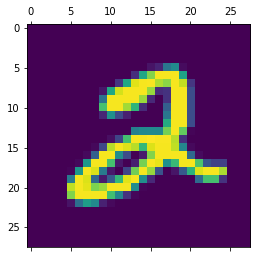

In [11]:
plt.matshow(X_train[5])

In [12]:
y_train[5]

2

In [13]:
#first 5 y labels
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
#Scaling the input to get more accuracy
X_train = X_train / 255
X_test = X_test / 255

In [23]:
#flatten 28*28 image

X_train.shape

(60000, 28, 28)

In [24]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [25]:
X_train_flattened.shape

(60000, 784)

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,),activation='sigmoid')#Dense means all the neurons in first layer ar econnected every other neurons in the next layer
])

model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',#categorical_cross entropy when lable are one hot encoded 
             metrics=['accuracy']
             )
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 633us/step - loss: 0.4684 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 1s 633us/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 625us/step - loss: 0.2831 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 1s 634us/step - loss: 0.2731 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 1s 650us/step - loss: 0.2666 - accuracy: 0.9258


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 760us/step - loss: 0.2706 - accuracy: 0.9242


[0.27058443427085876, 0.9241999983787537]

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 663us/step


array([2.5758015e-02, 4.4497045e-07, 5.0228205e-02, 9.7122103e-01,
       3.3816772e-03, 1.4475371e-01, 1.9162158e-06, 9.9985570e-01,
       1.1543788e-01, 7.1415025e-01], dtype=float32)

In [34]:
np.argmax(y_predicted[1])#get index with maximum value

2

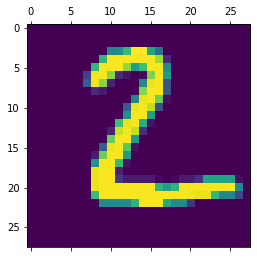

In [33]:
àconvert plt.matshow(X_test[1])

In [36]:
#convert y_predicted to whole numbers
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    7,    3,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,   10,  909,   28,   11,    4,   10,   10,   39,    4],
       [   3,    0,   12,  939,    0,   20,    2,   11,   15,    8],
       [   1,    1,    3,    2,  916,    0,   10,    5,    9,   35],
       [   9,    3,    2,   42,    9,  767,   14,    9,   30,    7],
       [  12,    3,    7,    2,    8,   15,  907,    2,    2,    0],
       [   1,    6,   19,   10,    7,    0,    0,  957,    3,   25],
       [   6,    9,    6,   37,    9,   28,    8,   13,  850,    8],
       [  11,    7,    1,   14,   27,    6,    0,   22,    3,  918]])>

Text(69.0, 0.5, 'Truth')

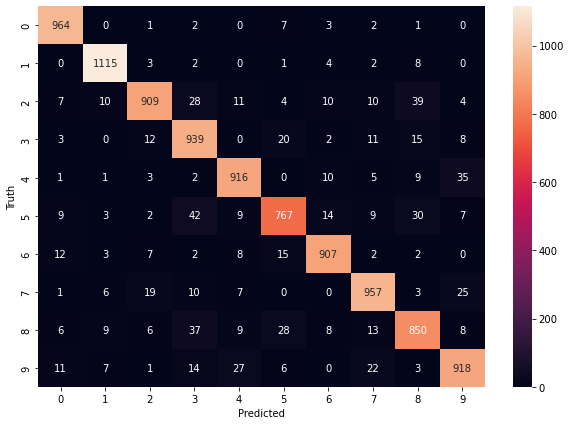

In [39]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
#Lets add hideen layer to check performance
model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')#Dense means all the neurons in first layer ar econnected every other neurons in the next layer
])

model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',#categorical_cross entropy when lable are one hot encoded 
             metrics=['accuracy']
             )
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 795us/step - loss: 0.2761 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 2s 930us/step - loss: 0.1276 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.0884 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.0680 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.0535 - accuracy: 0.9837


In [41]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 610us/step - loss: 0.0740 - accuracy: 0.9776


[0.07399328798055649, 0.9775999784469604]

Havig hideen layer increased our accuracy from 92% to 97%

313/313 [==============================] - 0s 720us/step


Text(69.0, 0.5, 'Truth')

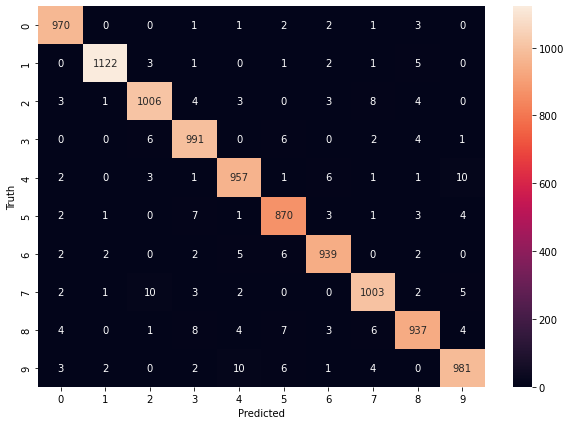

In [43]:
#convert y_predicted to whole numbers
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
#Without specifically flattening the array by keras can do it 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')#Dense means all the neurons in first layer ar econnected every other neurons in the next layer
])

model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',#categorical_cross entropy when lable are one hot encoded 
             metrics=['accuracy']
             )
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.2772 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 2s 930us/step - loss: 0.1230 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 2s 981us/step - loss: 0.0852 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0652 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0519 - accuracy: 0.9836


In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 751us/step - loss: 0.0763 - accuracy: 0.9750


[0.07633598893880844, 0.9750000238418579]

313/313 [==============================] - 0s 636us/step


Text(69.0, 0.5, 'Truth')

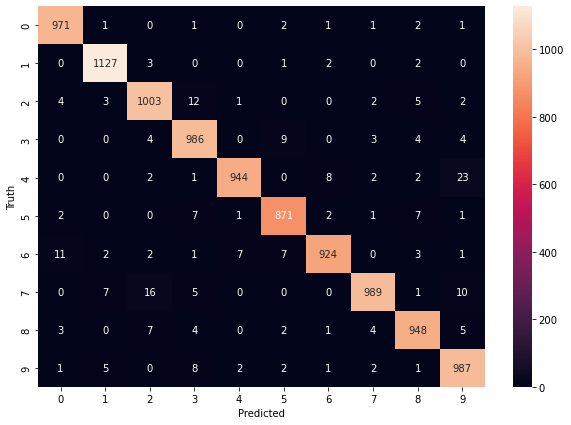

In [49]:
#convert y_predicted to whole numbers
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')